# Based on the data collected from UCI's open source datasets, we will prepare a model and test that model using basic Machine Learning algorithms to predict the stage of breast cancer.  The severity of cancer has been classified as 'benign' and 'malignant'. The different attribute data is collected based on the biopsy reports in which a tissue or fluid is extracted using a needle from a region in the breast that seems suspicious, and then tested under a microscope. This process is called as 'fine needle aspiration'.

# Attribute information:
## 1) ID number 

## 2) Diagnosis (M = malignant, B = benign) 3-32)




# Ten real-valued features are computed for each cell nucleus:

##   a) radius (mean of distances from center to points on the perimeter) 

##   b) texture (standard deviation of gray-scale values) 

##   c) perimeter 

##   d) area 

##   e) smoothness (local variation in radius lengths)

##   f) compactness (perimeter^2 / area - 1.0)

##   g) concavity (severity of concave portions of the contour) 

##   h) concave points (number of concave portions of the contour) 

##   i) symmetry

##   j) fractal dimension ("coastline approximation" - 1)

## The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

In [354]:
# Importing Packages
#Linear Algebra
import numpy as np               

#Data Processing
import pandas as pd

#Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
plt.rcParams.update({'font.size':15})

import seaborn as sns

#Machine Learning Algorithms
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import AdaBoostClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from sklearn.model_selection import cross_val_score

#Warnings
import warnings
warnings.filterwarnings("ignore")

In [355]:
can = pd.read_csv("C:\\data.csv")

In [356]:
can.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [357]:
can.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [358]:
can.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


# Step_1: Data Cleaning

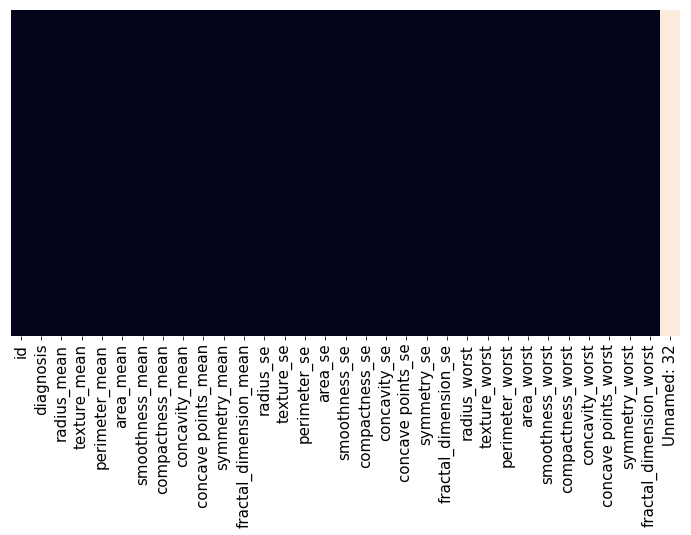

In [359]:
plt.figure(figsize=(12,6))

sns.heatmap(data = can.isnull(),yticklabels=False, cbar=False)

plt.show()

### Eliminating the columns 'id' and 'Unnamed: 32' since its 100% empty and are no longer required for further analysis.

In [360]:
can = can.drop(columns=["Unnamed: 32","id"])

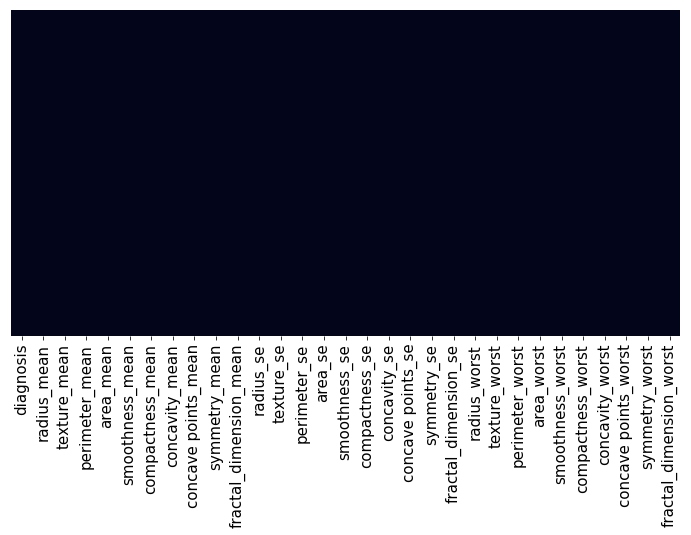

In [361]:
plt.figure(figsize=(12,6))

sns.heatmap(data = can.isnull(),yticklabels=False,cbar=False)

plt.show()

# Step 2: EDA or Exploratory Data Analysis

## It will be further convinent to classify the columns based on their respective category: mean, se or standard error and worst

In [362]:
can_mean = can[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 
               'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 
               'symmetry_mean', 'fractal_dimension_mean']]

can_se = can[['radius_se', 'texture_se', 'perimeter_se',
              'area_se', 'smoothness_se', 'compactness_se', 
              'concavity_se', 'concave points_se', 'symmetry_se']]

can_worst = can[['radius_worst', 'texture_worst', 'perimeter_worst',
                 'area_worst', 'smoothness_worst', 'compactness_worst', 
                 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']]

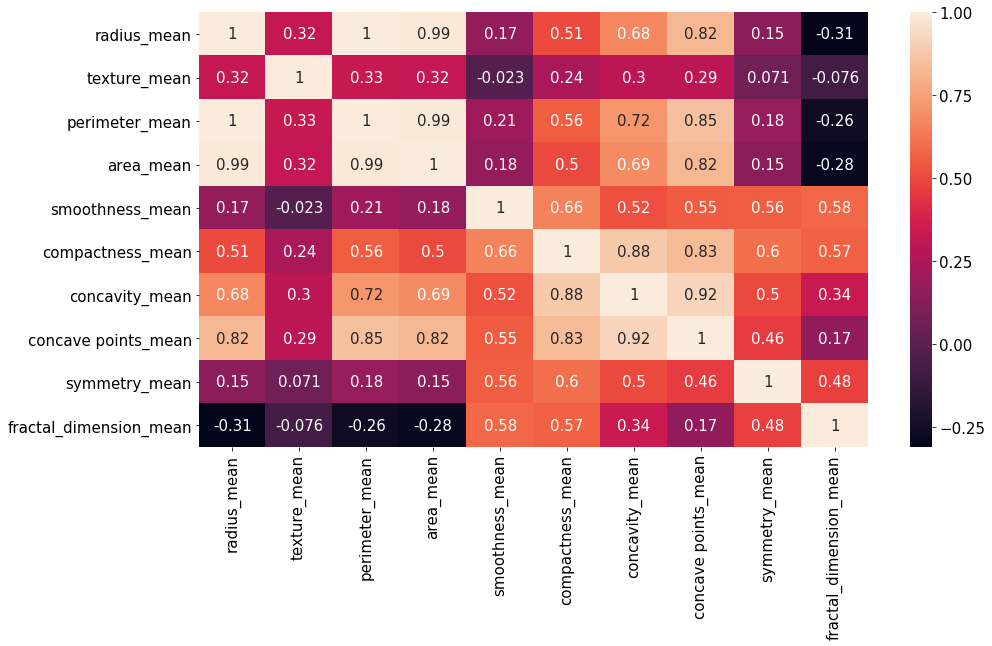

In [363]:
plt.figure(figsize=(15,8))

sns.heatmap(data = can_mean.corr(),
            annot = True)

plt.show()

## High correlation factor observed in : radius_mean, perimeter_mean, area_mean, concave_points_mean and concavity_mean. We will continue with these parameters for further concentrated analysis. 

## Now let us observe the pattern of correlation of the above identified parameters 

<Figure size 864x432 with 0 Axes>

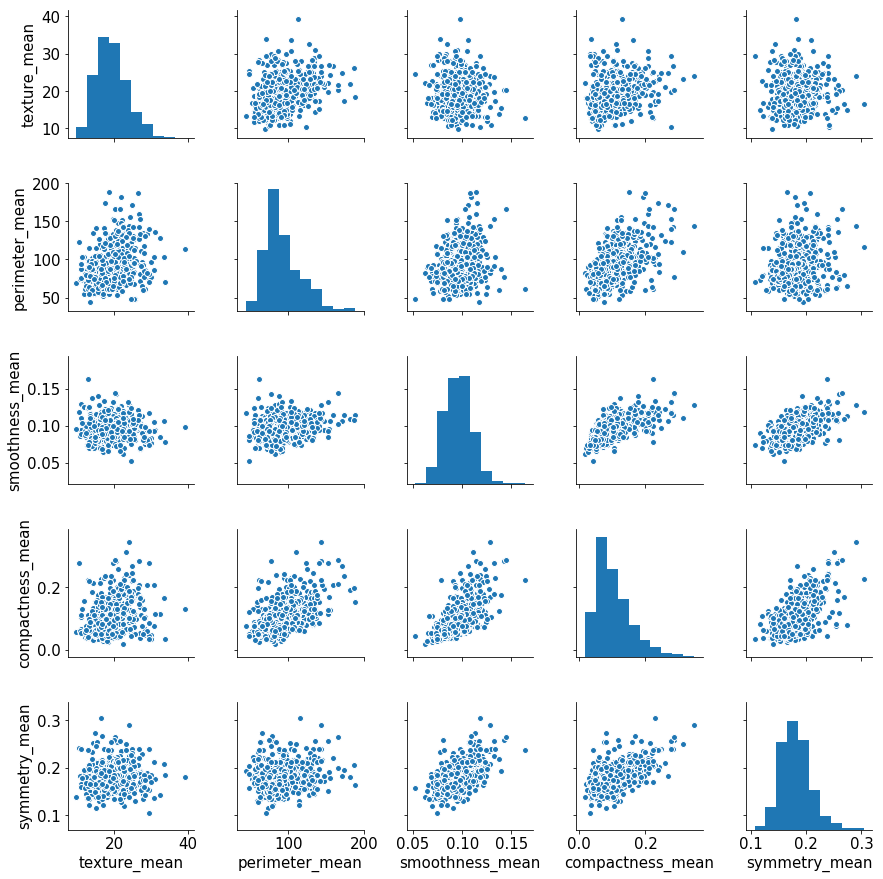

In [364]:
plt.figure(figsize=(12,6))

susps = can_mean[['texture_mean','perimeter_mean','smoothness_mean','compactness_mean','symmetry_mean']]

sns.pairplot(data = idf)

plt.show()

# Step 3: Machine Learning

## 3.1: Preparing the data

In [365]:
can['diagnosis'] = can['diagnosis'].map({"M":1,"B":0})

can.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## 3.2: Train -> Test -> Split Data

In [366]:
X = can_mean[['texture_mean','perimeter_mean','smoothness_mean','compactness_mean','symmetry_mean']]

y = can["diagnosis"]

In [367]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 1)

## 3.3.1: Logistic Regression

Classification_Report : 
             precision    recall  f1-score   support

          0       0.86      1.00      0.92        72
          1       1.00      0.71      0.83        42

avg / total       0.91      0.89      0.89       114



Confusion_Matrix : 


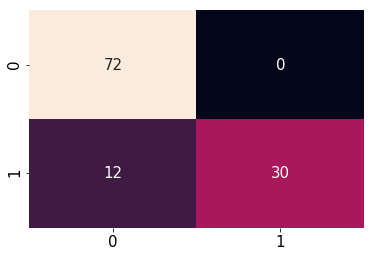



Accuracy Score = 89.47 % is the probability that the tumor is cancerous.


Cross Validation score: [83.15789474 90.         91.53439153]


In [385]:
logreg_1 = LogisticRegression()

logreg_1.fit(X_train, y_train)

pred_1 = logreg_1.predict(X_test)

cv1 = cross_val_score(logreg_1,X,y)*100

print("Classification_Report : ")
print(classification_report(y_test, pred_1))
print("\n")
print("Confusion_Matrix : ")
sns.heatmap(confusion_matrix(y_test,pred_1),annot=True,cbar=False)
plt.show()
print("\n")
print("Accuracy Score = "+str(round(accuracy_score(y_test, pred_1)*100,2))+" % is the probability that the tumor is cancerous.")
print("\n")
print("Cross Validation score: "+str(cross_val_score(logreg_1,X,y)*100))

## 3.3.2: Support Vector Machine

Classification_Report : 
             precision    recall  f1-score   support

          0       0.87      0.94      0.91        72
          1       0.89      0.76      0.82        42

avg / total       0.88      0.88      0.87       114



Confusion_Matrix : 


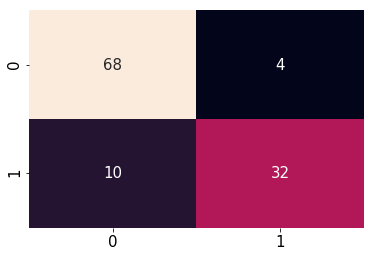



Accuracy Score = 87.72 % is the probability that the tumor is cancerous.


Cross Validation score: [83.15789474 89.47368421 83.5978836 ]


In [384]:
svm = SVC()

svm.fit(X_train, y_train)

pred_2 = svm.predict(X_test)
cv2 = cross_val_score(svm,X,y)*100

print("Classification_Report : ")
print(classification_report(y_test, pred_2))
print("\n")
print("Confusion_Matrix : ")
sns.heatmap(confusion_matrix(y_test,pred_2),annot=True,cbar=False)
plt.show()
print("\n")
print("Accuracy Score = "+str(round(accuracy_score(y_test, pred_2)*100,2))+" % is the probability that the tumor is cancerous.")
print("\n")
print("Cross Validation score: "+str(cross_val_score(svm,X,y)*100))

## 3.3.3: Random Forest Classifier

Classification_Report : 
             precision    recall  f1-score   support

          0       0.89      0.97      0.93        72
          1       0.94      0.79      0.86        42

avg / total       0.91      0.90      0.90       114



Confusion_Matrix : 


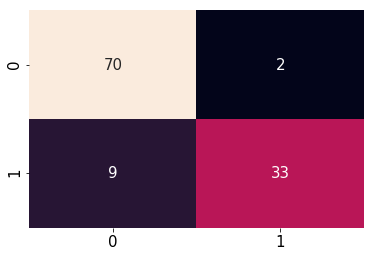



Accuracy Score = 90.35 % is the probability that the tumor is cancerous.


Cross Validation score: [88.94736842 92.63157895 89.94708995]


In [383]:
rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)

pred_3 = rfc.predict(X_test)
cv3 = cross_val_score(rfc,X,y)*100
print("Classification_Report : ")
print(classification_report(y_test, pred_3))
print("\n")
print("Confusion_Matrix : ")
sns.heatmap(confusion_matrix(y_test,pred_3),annot=True,cbar=False)
plt.show()
print("\n")
print("Accuracy Score = "+str(round(accuracy_score(y_test, pred_3)*100,2))+" % is the probability that the tumor is cancerous.")
print("\n")
print("Cross Validation score: "+str(cross_val_score(rfc,X,y)*100))

## 3.3.4: K Nearest Neighbors

Classification_Report : 
             precision    recall  f1-score   support

          0       0.86      0.92      0.89        72
          1       0.84      0.74      0.78        42

avg / total       0.85      0.85      0.85       114



Confusion_Matrix : 


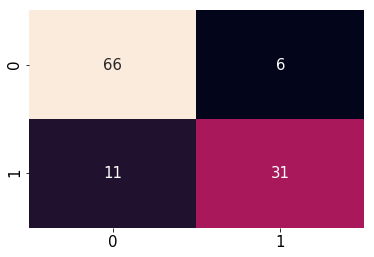



Accuracy Score = 85.09 % is the probability that the tumor is cancerous.


Cross Validation score: [85.26315789 91.57894737 86.77248677]


In [382]:
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

pred_4 = knn.predict(X_test)
cv4 = cross_val_score(knn,X,y)*100
print("Classification_Report : ")
print(classification_report(y_test, pred_4))
print("\n")
print("Confusion_Matrix : ")
sns.heatmap(confusion_matrix(y_test,pred_4),annot=True,cbar=False)
plt.show()
print("\n")
print("Accuracy Score = "+str(round(accuracy_score(y_test, pred_4)*100,2))+" % is the probability that the tumor is cancerous.")
print("\n")
print("Cross Validation score: "+str(cross_val_score(knn,X,y)*100))

## 3.3.5: AdaBoost Classifier

Classification_Report : 
             precision    recall  f1-score   support

          0       0.89      0.99      0.93        72
          1       0.97      0.79      0.87        42

avg / total       0.92      0.91      0.91       114



Confusion_Matrix : 


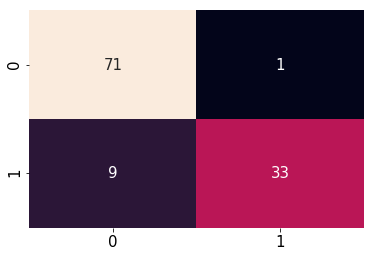



Accuracy Score = 91.23 % is the probability that the tumor is cancerous.


Cross Validation score: [92.10526316 91.57894737 91.00529101]


In [381]:
ABClass = AdaBoostClassifier()

ABClass.fit(X_train, y_train)

pred_5 = ABClass.predict(X_test)
cv5 = cross_val_score(ABClass,X,y)*100
print("Classification_Report : ")
print(classification_report(y_test, pred_5))
print("\n")
print("Confusion_Matrix : ")
sns.heatmap(confusion_matrix(y_test,pred_5),annot=True,cbar=False)
plt.show()
print("\n")
print("Accuracy Score = "+str(round(accuracy_score(y_test, pred_5)*100,2))+" % is the probability that the tumor is cancerous.")
print("\n")
print("Cross Validation score: "+str(cross_val_score(ABClass,X,y)*100))

## 3.3.6: Naive Bayes

Classification_Report : 
             precision    recall  f1-score   support

          0       0.91      0.96      0.93        72
          1       0.92      0.83      0.88        42

avg / total       0.91      0.91      0.91       114



Confusion_Matrix : 


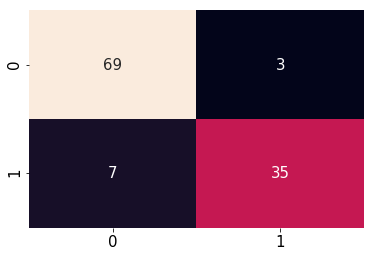



Accuracy Score = 91.23 % is the probability that the tumor is cancerous.


Cross Validation score: [88.42105263 92.63157895 89.94708995]


In [380]:
from sklearn.naive_bayes import GaussianNB

NBClass = GaussianNB()

NBClass.fit(X_train, y_train)

pred_6 = NBClass.predict(X_test)
cv6 = cross_val_score(NBClass,X,y)*100
print("Classification_Report : ")
print(classification_report(y_test, pred_6))
print("\n")
print("Confusion_Matrix : ")
sns.heatmap(confusion_matrix(y_test,pred_6),annot=True,cbar=False)
plt.show()
print("\n")
print("Accuracy Score = "+str(round(accuracy_score(y_test, pred_6)*100,2))+" % is the probability that the tumor is cancerous.")
print("\n")
print("Cross Validation score: "+str(cross_val_score(NBClass,X,y)*100))

## 3.3.7: Decision Trees

Classification_Report : 
             precision    recall  f1-score   support

          0       0.83      0.94      0.88        72
          1       0.88      0.67      0.76        42

avg / total       0.85      0.84      0.84       114



Confusion_Matrix : 


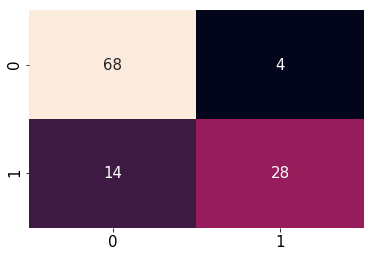



Accuracy Score = 84.21 % is the probability that the tumor is cancerous.


Cross Validation score: [89.47368421 91.05263158 88.88888889]


In [379]:
from sklearn.tree import DecisionTreeClassifier

DTClass = DecisionTreeClassifier()

DTClass.fit(X_train, y_train)

pred_7 = DTClass.predict(X_test)
cv7 = cross_val_score(DTClass,X,y)*100
print("Classification_Report : ")
print(classification_report(y_test, pred_7))
print("\n")
print("Confusion_Matrix : ")
sns.heatmap(confusion_matrix(y_test,pred_7),annot=True,cbar=False)
plt.show()
print("\n")
print("Accuracy Score = "+str(round(accuracy_score(y_test, pred_7)*100,2))+" % is the probability that the tumor is cancerous.")
print("\n")
print("Cross Validation score: "+str(cross_val_score(DTClass,X,y)*100))

## 3.4: Summary

In [375]:
summary = pd.DataFrame({"Model Used" : ["LogisticRegression","SVC","RandomForest","KNN","AdaBoostClassifier","NaiveBayesClass",
                                       "DecisionTreeAlgorithm"],
                        "Accuracy_of_prediction ( % )": [round(accuracy_score(y_test,pred_1)*100,2),
                                         round(accuracy_score(y_test,pred_2)*100,2),
                                         round(accuracy_score(y_test,pred_3)*100,2),
                                         round(accuracy_score(y_test,pred_4)*100,2),
                                         round(accuracy_score(y_test,pred_5)*100,2),
                                         round(accuracy_score(y_test,pred_6)*100,2),
                                         round(accuracy_score(y_test,pred_7)*100,2)]})
            
    
summary

,Model Used,Accuracy_of_prediction ( % )
0,LogisticRegression,89.47
1,SVC,87.72
2,RandomForest,90.35
3,KNN,85.09
4,AdaBoostClassifier,91.23
5,NaiveBayesClass,91.23
6,DecisionTreeAlgorithm,84.21
